# Bayesian Inference


To get our baseline inferences, we should find the probablities of of each combination of cards.

In [23]:
import random
import math
# Baye's Theorem
# P(A|B) = P(B|A)*P(A) / P(B)

SUITS = 4
TOTAL_CARDS = 40
HAND = 10
COMMON_CARDS = 12
COMMON_SUIT = "Spades"
CARDS_REMAINING = TOTAL_CARDS - COMMON_CARDS
PROBABILITY_COMMON = 1/SUITS
PROB_SUIT_10 = 2/3
PROB_SUIT_8 = 1/3

# TODO

Refactor the compute_probabilities_range to accept integers, not arrays

In [4]:
def compute_probabilities_range(suit_observations):
    r = {}
    for observation in suit_observations:
        # Number of total hands
        total_hands = math.comb(TOTAL_CARDS, COMMON_CARDS)
        remaining_hand = HAND - observation

        # Number of ways to get [obs] spades in hand assuming Spades is common suit
        # N Spades | Spades is common suit
        # First part is the # combinations of the common suit, second part is the rest of the hand
        ways_obs_spades_common = math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING, remaining_hand)

        # Number of ways to get [obs] spades in hand assuming Spades is NOT the common suit
        # N Spades | Spades is not common suit
        # This is assuming that spades is 10 cards
        ways_obs_spades_10 = math.comb(10, observation) * math.comb(TOTAL_CARDS - 10, remaining_hand)

        # Number of ways to get [obs] spades in hand assuming Spades is NOT the common suit
        # N Spades | Spades is not common suit
        # This is assuming that spades is 8 cards
        ways_obs_spades_8 = math.comb(8, observation) * math.comb(TOTAL_CARDS - 8, remaining_hand)

        

        # Probability of [obs] Spades given Spades is common
        prob_obs_spades_common = ways_obs_spades_common / total_hands
        # Probability of [obs] Spades given Spades is not common (10 cards)
        prob_obs_spades_not_common_10 = ways_obs_spades_10 / total_hands
        # Probability of [obs] Spades given Spades is not common (8 cards)
        prob_obs_spades_not_common_8 = ways_obs_spades_8 / total_hands

        prob_obs_spades_not_common = prob_obs_spades_not_common_10 * 2/3 + prob_obs_spades_not_common_8 * 1/3

        #                 prob_obs_spades_common * PROBABILITY_COMMON + prob_obs_spades_not_common * (1 - PROBABILITY_COMMON)
        prob_obs_spades = prob_obs_spades_common * 0.25 + prob_obs_spades_not_common_10 * 0.5 + prob_obs_spades_not_common_8 * 0.25
        prob_common_given_obs_spades = prob_obs_spades_common * PROBABILITY_COMMON / prob_obs_spades

        r[observation] = round(prob_common_given_obs_spades, 4)
    
    return r


In [5]:
import matplotlib.pyplot as plt

def plot_probabilities_range(results, Title, x_label, y_label):
    x = list(results.keys())
    y = list(results.values())

    fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
    fig.patch.set_facecolor("#1F1F3A")
    ax.set_facecolor("#232446")

    ax.plot(
        x,
        y,
        color="#FF77A8",
        linewidth=3,
        marker="o",
        markersize=8,
        markerfacecolor="#FF77A8",
        markeredgecolor="#FFD4E3",
        markeredgewidth=1.2,
    )
    ax.fill_between(x, y, color="#FF77A8", alpha=0.15)

    for xi, yi in zip(x, y):
        ax.annotate(
            f"{yi:.2f}",
            (xi, yi),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
            fontsize=9,
            color="#F6F7FF",
            bbox=dict(
                facecolor="#2B2D55",
                edgecolor="none",
                boxstyle="round,pad=0.25",
                alpha=0.85,
            ),
        )

    ax.set_xlabel(x_label, color="#D8DAFF", fontsize=12)
    ax.set_ylabel(y_label, color="#D8DAFF", fontsize=12)
    ax.set_title(
        Title,
        color="#F6F7FF",
        fontsize=14,
        pad=12,
    )

    ax.tick_params(colors="#B8BBE6", labelsize=11)
    ax.grid(True, which="major", linestyle="-", linewidth=1, alpha=0.22, color="#9EA3FF")

    for spine in ax.spines.values():
        spine.set_color("#5E628F")

    ax.set_ylim(bottom=0, top=min(1, max(y) + 0.08))
    plt.tight_layout()
    plt.show()

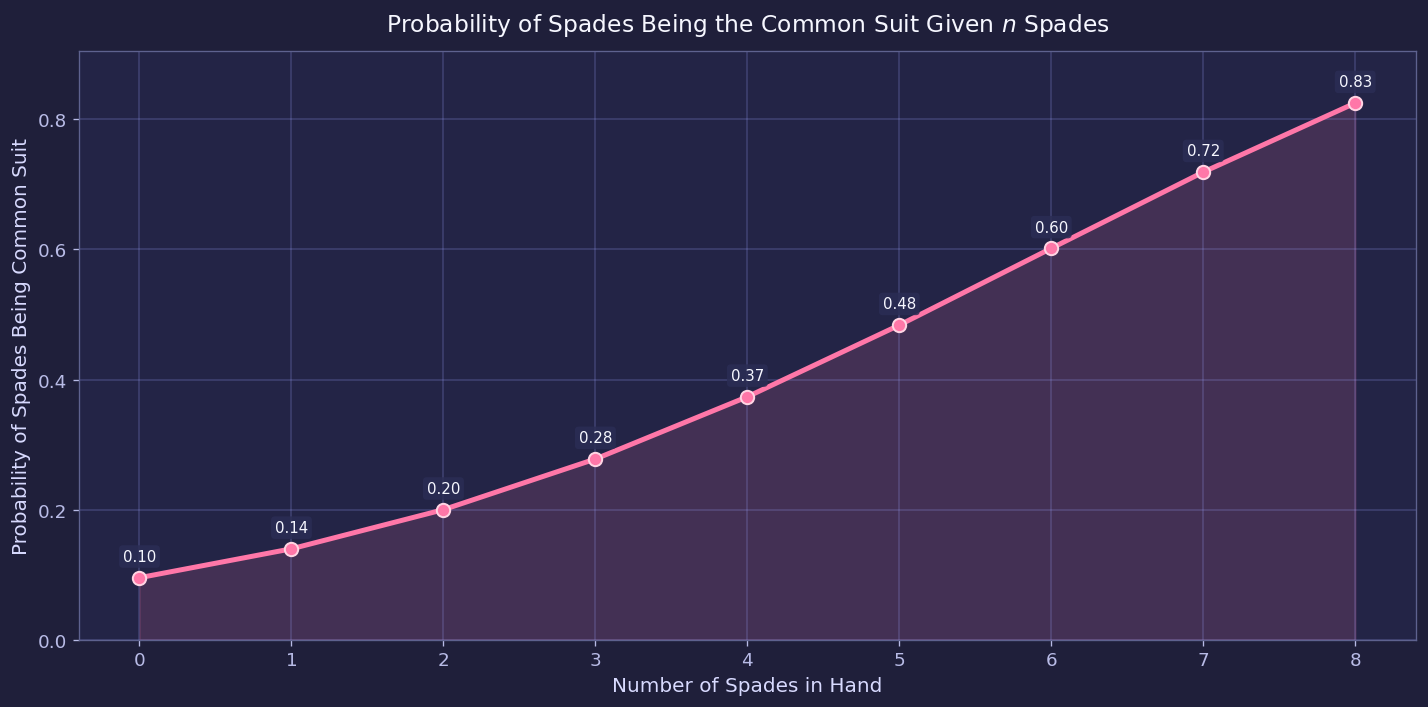

In [6]:
SPADES_OBSERVATIONS = range(0,9)

probabilities = compute_probabilities_range(SPADES_OBSERVATIONS)
plot_probabilities_range(probabilities, r"Probability of Spades Being the Common Suit Given $n$ Spades", "Number of Spades in Hand", "Probability of Spades Being Common Suit")

## Two Suits with Information
What about the case where we have 7 Spades and 3 Hearts? Or 6 Spades and 2 Hearts? How does this change our probability? 

In [7]:
# This probability only works if the other suit being observed is not the potential target suit (I.E. Can't test for Spades and Clubs, since that would require a different model)

def compute_multi_card_range(suit_observation, other_suit_observations):
    r = {}
    for observation in other_suit_observations:
        # Number of total hands
        total_hands = math.comb(TOTAL_CARDS, COMMON_CARDS)
        remaining_hand = HAND - observation - suit_observation

        # Number of ways to get n Spades and x Hearts, assuming Spades is the common suit
        # (Comb common 12 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_common_x_hearts_10 = math.comb(COMMON_CARDS, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is the common suit
        # (Comb common 12 suit) * (Comb other 8 suit) * (Comb rest of hand)
        ways_n_spades_common_x_hearts_8 = math.comb(COMMON_CARDS, suit_observation) * math.comb(8, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 8, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 10 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_10_x_hearts_10 = math.comb(10, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - 10 - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 8 suit) * (Comb other 10 suit) * (Comb rest of hand)
        ways_n_spades_8_x_hearts_10 = math.comb(8, suit_observation) * math.comb(10, observation) * math.comb(CARDS_REMAINING - 8 - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not common suit
        # (Comb 10 suit) * (Comb other 8 suit) * (Comb rest of hand)
        ways_n_spades_10_x_hearts_8 = math.comb(10, suit_observation) * math.comb(8, observation) * math.comb(CARDS_REMAINING - 10 - 8, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not the common suit
        # (Comb 10 suit) * (Comb other common 12 suit) * (Comb rest of hand)
        ways_n_spades_10_common_x_hearts = math.comb(10, suit_observation) * math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 10, remaining_hand)

        # Number of ways to get n Spades and x Hearts, assuming Spades is not the common suit
        # (Comb 8 suit) * (Comb other common 12 suit) * (Comb rest of hand)
        ways_n_spades_8_common_x_hearts = math.comb(8, suit_observation) * math.comb(COMMON_CARDS, observation) * math.comb(CARDS_REMAINING - COMMON_CARDS - 8, remaining_hand)



        # Probability of n Spades and x Hearts given Spades is common suit
        prob_n_spades_common_x_hearts = (ways_n_spades_common_x_hearts_10 * 2/3 + ways_n_spades_common_x_hearts_8 * 1/3) / total_hands
        # Probability of n Spades and x Hearts given both Spades and Hearts are not common suit
        prob_n_spades_x_hearts_both_not_common = (ways_n_spades_10_x_hearts_10 + ways_n_spades_10_x_hearts_8 + ways_n_spades_8_x_hearts_10) * (1/3) / total_hands
        # Probability of n Spades and x Hearts given Spades is not common suit
        prob_n_spades_x_hearts_spades_not_common = (ways_n_spades_10_common_x_hearts * 2/3 + ways_n_spades_8_common_x_hearts * 1/3) / total_hands

        # Probability of n Spades and x Hearts
        prob_n_spades_x_hearts = prob_n_spades_common_x_hearts * 0.25 + prob_n_spades_x_hearts_both_not_common * 0.5 + prob_n_spades_x_hearts_spades_not_common * 0.25

        prob_spades_common_given_n_spades_x_hearts = prob_n_spades_common_x_hearts * PROBABILITY_COMMON / prob_n_spades_x_hearts



        r[observation] = round(prob_spades_common_given_n_spades_x_hearts, 4)
    
    return r


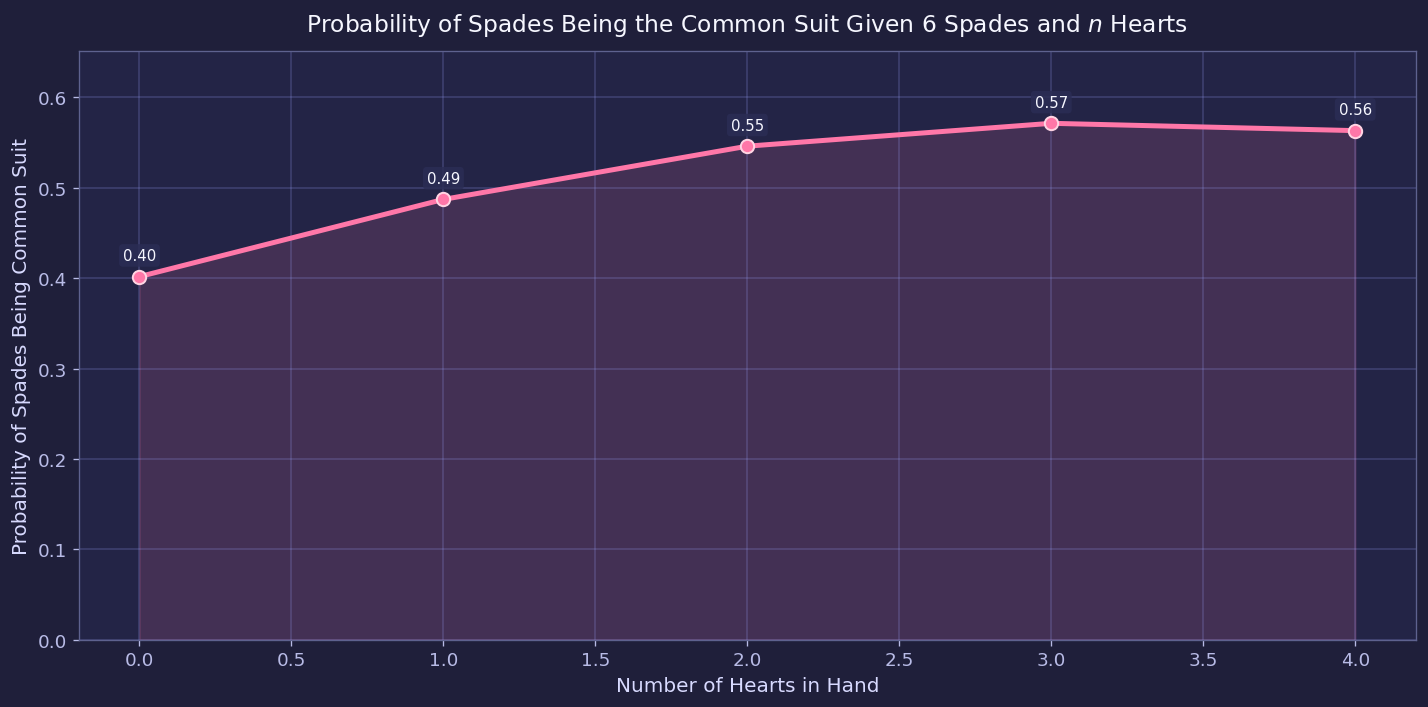

In [8]:
SPADES_OBSERVATIONS = 6
HEARTS_OBSERVATIONS = range(0, HAND - SPADES_OBSERVATIONS + 1)

probabilities = compute_multi_card_range(SPADES_OBSERVATIONS, HEARTS_OBSERVATIONS)
plot_probabilities_range(probabilities, fr"Probability of Spades Being the Common Suit Given {SPADES_OBSERVATIONS} Spades and $n$ Hearts", "Number of Hearts in Hand", "Probability of Spades Being Common Suit")

In [9]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def multi_card_heatmap():
    SPADES_OBSERVATIONS = range(0, HAND + 1)
    probabilities = []
    for spades_obs in SPADES_OBSERVATIONS:
        HEARTS_OBSERVATIONS = range(0, HAND - spades_obs + 1)
        probabilities.append(compute_multi_card_range(spades_obs, HEARTS_OBSERVATIONS))

    # print(probabilities)
    results = np.empty((len(SPADES_OBSERVATIONS), HAND + 1))
    results[:] = np.nan
    for spade_obs in range(len(probabilities)):
        y = list(probabilities[spade_obs].values())
        results[spade_obs][:len(y)] = y
    results = results.transpose()

    # Create custom colormap from dark blue to pink
    cmap = LinearSegmentedColormap.from_list("blue_pink", ["#1F1F3A", "#FF77A8"])

    fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
    fig.patch.set_facecolor("#1F1F3A")
    ax.set_facecolor("#232446")

    # Display heatmap with custom colormap
    im = ax.imshow(results, cmap=cmap, vmin=0, vmax=1)

    # Add grid lines (slightly brighter than background)
    ax.set_xticks(np.arange(len(SPADES_OBSERVATIONS)) - 0.5, minor=True)
    ax.set_yticks(np.arange(HAND + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="#3a3a5f", linewidth=1.5)

    # Set major ticks
    ax.set_xticks(SPADES_OBSERVATIONS)
    ax.set_yticks(SPADES_OBSERVATIONS)

    # Make tick labels white-ish
    ax.tick_params(colors="#E8EAFF", labelsize=11)

    # Add text annotations with 2 decimals, leave NaN cells empty
    for i in range(results.shape[0]):
        for j in range(results.shape[1]):
            if not np.isnan(results[i, j]):
                text = ax.text(j, i, f"{results[i, j]:.2f}",
                            ha="center", va="center", color="#F6F7FF", fontsize=9, fontweight="bold")

    ax.set_xlabel("Number of Spades in Hand", color="#D8DAFF", fontsize=12)
    ax.set_ylabel("Number of Hearts in Hand", color="#D8DAFF", fontsize=12)
    ax.set_title(r"Probability of Spades Being the Common Suit Given $n$ Spades and $x$ Hearts", color="#F6F7FF", fontsize=14, pad=12)

    # Style spines
    for spine in ax.spines.values():
        spine.set_color("#5E628F")

    fig.tight_layout()
    plt.show()

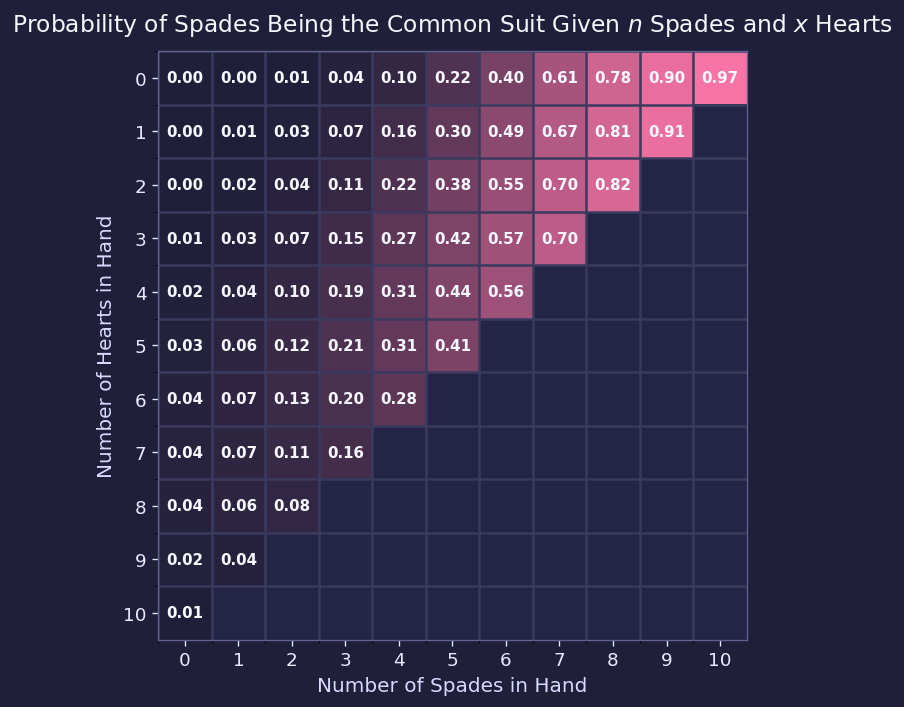

In [10]:
multi_card_heatmap()

# Marginal Value of Buying Cards

Now that we know the odds of the common suit, we can focus on finding the *worth* of each card. If we wanted to buy a new card, what would be our expected return? How can we quantify how much a card is worth?

For these assumptions, I will calculate the expected value of our card by the amount received at the end of a round per chip, and how much you gain through majority pot winnings.


Let:
- $X$ be the suit
- $T$ be the target suit
- $M$ be the majority
- $H_X$ be the amount of suit $X$ in your hand

$$EV_X = P(T=X) (10 \cdot \mathbb{E}[H_X | T=X] + 200 \cdot P(M | T=X))$$

Our expected value for a buying a card of suit $X$ is the combination of two terms. The payout per chip at the end of the round is linear, but the probability of having the majority of suit $X$ at the end of the round is non-linear and discrete. 


In [ ]:
# Find the probability of having the majority of a suit given an observation of that suit in hand.
# Accounts for the possibility of the suit being 10 or 8 cards.
# NOTE: This doesn't include the possibility of having ties, which would be calculated later.
def compute_majority_probability(suit_observation):
    if suit_observation >= 6:
         return 1.0
    if suit_observation <= 2:
        return 0.0


    remaining_suit_10 = 10 - suit_observation
    num_total_remaining_arrangements_10 = math.comb(remaining_suit_10 + 2, remaining_suit_10)
    num_majority_arrangements_10 = 0

    for player_1 in range(0, remaining_suit_10 + 1):
        for player_2 in range(0, remaining_suit_10 - player_1 + 1):
            player_3 = remaining_suit_10 - player_1 - player_2
            if max(player_1, player_2, player_3) < suit_observation:
                num_majority_arrangements_10 += 1



    remaining_suit_8 = 8 - suit_observation
    total_remaining_arrangements_8 = math.comb(remaining_suit_8 + 2, remaining_suit_8)
    num_majority_arrangements_8 = 0

    for player_1 in range(0, remaining_suit_8 + 1):
        for player_2 in range(0, remaining_suit_8 - player_1 + 1):
            player_3 = remaining_suit_8 - player_1 - player_2
            if max(player_1, player_2, player_3) < suit_observation:
                num_majority_arrangements_8 += 1
    

    prob_majority_given_10 = num_majority_arrangements_10 / num_total_remaining_arrangements_10
    prob_majority_given_8 = num_majority_arrangements_8 / total_remaining_arrangements_8

    total_prob_majority = prob_majority_given_10 * PROB_SUIT_10 + prob_majority_given_8 * PROB_SUIT_8
    return round(total_prob_majority, 4)

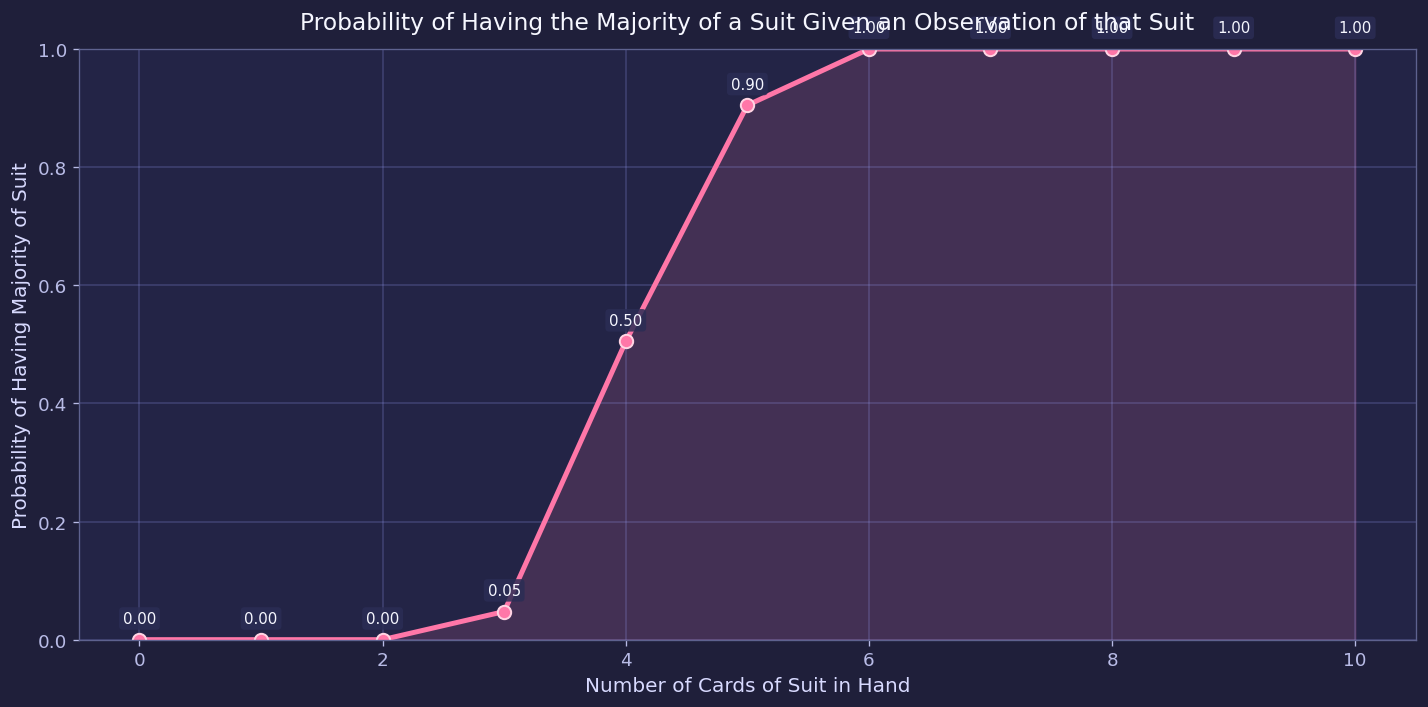

In [29]:
plot_probabilities_range({i: compute_majority_probability(i) for i in range(0, HAND + 1)}, "Probability of Having the Majority of a Suit Given an Observation of that Suit", "Number of Cards of Suit in Hand", "Probability of Having Majority of Suit")

In [60]:
# Calculates the expected payout for an observed number of cards (assuming they are the target suit)
def expected_payout_of_cards(cross_suit_observation, suit_observation):
    prob_target_suit = compute_probabilities_range([cross_suit_observation])
    prob_majority = compute_majority_probability(suit_observation)

    EV = prob_target_suit[cross_suit_observation] * (10 * suit_observation + 200 * prob_majority)
    return round(EV, 2)

# Returns the marginal value of picking up another card (assuming it is the target suit)
def marginal_value_of_card(cross_suit_observation, current_suit_observation):
    current_cards = expected_payout_of_cards(cross_suit_observation, current_suit_observation)
    new_cards = expected_payout_of_cards(cross_suit_observation, current_suit_observation + 1)

    marginal_value = new_cards - current_cards
    return round(marginal_value, 2)

In [102]:
def marginal_value_heatmap(CROSS_SUIT_OBSERVATIONS, SUIT_OBSERVATIONS, results, title, x_label, y_label):
    
    min_val = np.nanmin(results)
    max_val = np.nanmax(results)

    cmap = LinearSegmentedColormap.from_list("blue_pink", ["#1F1F3A", "#FF77A8"])

    fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
    fig.patch.set_facecolor("#1F1F3A")
    ax.set_facecolor("#232446")

    im = ax.imshow(results, cmap=cmap, vmin=min_val, vmax=max_val)

    ax.set_xticks(np.arange(len(SUIT_OBSERVATIONS)) - 0.5, minor=True)
    ax.set_yticks(np.arange(len(CROSS_SUIT_OBSERVATIONS)) - 0.5, minor=True)
    ax.grid(which="minor", color="#3a3a5f", linewidth=1.5)

    ax.set_xticks(range(len(SUIT_OBSERVATIONS)))
    ax.set_xticklabels(list(SUIT_OBSERVATIONS))
    ax.set_yticks(range(len(CROSS_SUIT_OBSERVATIONS)))
    ax.set_yticklabels(list(CROSS_SUIT_OBSERVATIONS))

    ax.tick_params(colors="#E8EAFF", labelsize=11)

    for i in range(results.shape[0]):
        for j in range(results.shape[1]):
            text = ax.text(j, i, f"{results[i, j]:.2f}",
                           ha="center", va="center", color="#F6F7FF", fontsize=9, fontweight="bold")

    ax.set_xlabel(x_label, color="#D8DAFF", fontsize=12)
    ax.set_ylabel(y_label, color="#D8DAFF", fontsize=12)
    ax.set_title(title, color="#F6F7FF", fontsize=14, pad=12)

    for spine in ax.spines.values():
        spine.set_color("#5E628F")

    fig.tight_layout()
    plt.show()

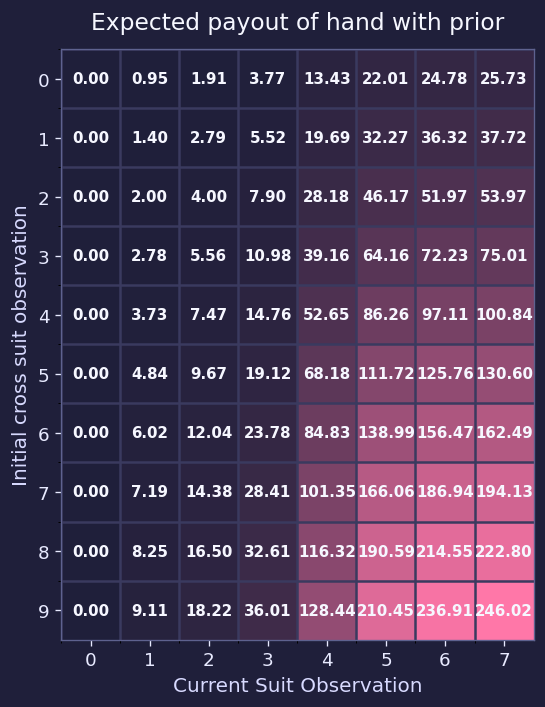

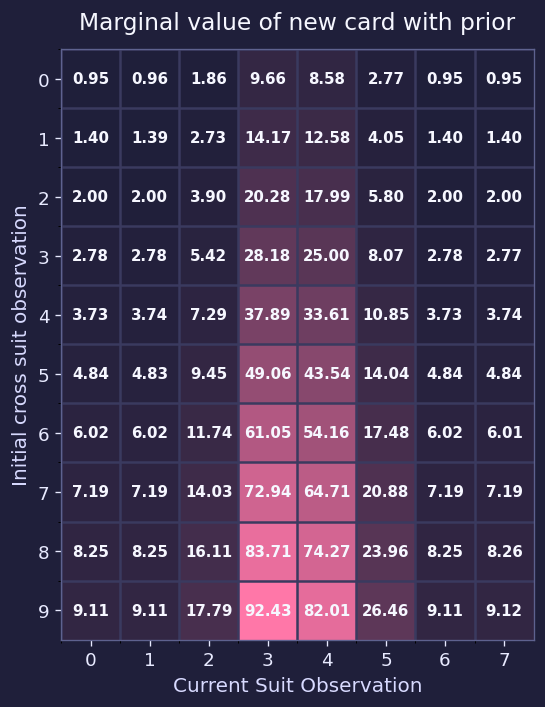

In [105]:
SUIT_OBSERVATIONS = range(0, 8)
CROSS_SUIT_OBSERVATIONS = range(0, 10)

results = np.empty((len(CROSS_SUIT_OBSERVATIONS), len(SUIT_OBSERVATIONS)))
expected_payouts = np.empty((len(CROSS_SUIT_OBSERVATIONS), len(SUIT_OBSERVATIONS)))

for cross_idx, cross_suit in enumerate(CROSS_SUIT_OBSERVATIONS):
    for suit_idx, suit_obs in enumerate(SUIT_OBSERVATIONS):
        expected_payouts[cross_idx][suit_idx] = expected_payout_of_cards(cross_suit, suit_obs)
        results[cross_idx][suit_idx] = marginal_value_of_card(cross_suit, suit_obs)

marginal_value_heatmap(CROSS_SUIT_OBSERVATIONS, SUIT_OBSERVATIONS, expected_payouts, "Expected payout of hand with prior", "Current Suit Observation", "Initial cross suit observation")
marginal_value_heatmap(CROSS_SUIT_OBSERVATIONS, SUIT_OBSERVATIONS, results, "Marginal value of new card with prior", "Current Suit Observation", "Initial cross suit observation")

Looking at our graph, the 3rd and 4th card in our suspected target suit would have the greatest return on investment, and we should be willing to pay more for these cards than any other.


However, we still need to calculate the probability of ties, where the pot is split among the tied players.

$$200 \cdot P(M) + 200 \cdot \mathbb{E}[\frac{1}{k}|M=M_i] \cdot P(M=M_i)$$

Here we have two terms; The first is used to find the expected value of our pot given that we have the majority.

The second term is used to find the expected value of the pot given that we have a tie. We find the expected value of the split (among 2, 3, or 4 players) and the probability of that happening.  

In [112]:
def compute_expected_pot_with_ties(suit_observation):
    expected_ties = 0.0
    prob_tie = 0.0

    if 3 <= suit_observation <= 5:
        remaining_suit_10 = 10 - suit_observation
        num_total_remaining_arrangements_10 = math.comb(remaining_suit_10 + 2, remaining_suit_10)
        num_tie_arrangements_10 = 0
        num_2_tied_10 = 0
        num_3_tied_10 = 0
        num_4_tied_10 = 0

        # Iterate through all other arrangements, count how many arrangements have ties, 2 ties, 3 ties, and 4 ties
        for player_1 in range(0, remaining_suit_10 + 1):
            for player_2 in range(0, remaining_suit_10 - player_1 + 1):
                player_3 = remaining_suit_10 - player_1 - player_2
                num_ties = sum([player_1 == suit_observation, player_2 == suit_observation, player_3 == suit_observation])
                if num_ties > 0:
                    num_tie_arrangements_10 += 1
                if num_ties == 1:
                    num_2_tied_10 += 1
                elif num_ties == 2:
                    num_3_tied_10 += 1
                elif num_ties == 3:
                    num_4_tied_10 += 1



        remaining_suit_8 = 8 - suit_observation
        total_remaining_arrangements_8 = math.comb(remaining_suit_8 + 2, remaining_suit_8)
        num_tie_arrangements_8 = 0
        num_2_tied_8 = 0
        num_3_tied_8 = 0
        num_4_tied_8 = 0

        for player_1 in range(0, remaining_suit_8 + 1):
            for player_2 in range(0, remaining_suit_8 - player_1 + 1):
                player_3 = remaining_suit_8 - player_1 - player_2
                num_ties = sum([player_1 == suit_observation, player_2 == suit_observation, player_3 == suit_observation])
                if num_ties > 0:
                    num_tie_arrangements_8 += 1
                if num_ties == 1:
                    num_2_tied_8 += 1
                elif num_ties == 2:
                    num_3_tied_8 += 1
                elif num_ties == 3:
                    num_4_tied_8 += 1

        

        prob_tie_given_10 = num_tie_arrangements_10 / num_total_remaining_arrangements_10
        prob_tie_given_8 = num_tie_arrangements_8 / total_remaining_arrangements_8
        prob_tie = prob_tie_given_10 * PROB_SUIT_10 + prob_tie_given_8 * PROB_SUIT_8

        # Naming is a bit confusing. 1 tie means that there are 2 players tied for the majority, 2 ties means 3 players tied for the majority, and 3 ties means all 4 players tied for the majority.
        prob_1_tie_given_10 = num_2_tied_10 / num_total_remaining_arrangements_10
        prob_1_tie_given_8 = num_2_tied_8 / total_remaining_arrangements_8
        prob_1_tie = prob_1_tie_given_10 * PROB_SUIT_10 + prob_1_tie_given_8 * PROB_SUIT_8

        prob_2_tie_given_10 = num_3_tied_10 / num_total_remaining_arrangements_10
        prob_2_tie_given_8 = num_3_tied_8 / total_remaining_arrangements_8
        prob_2_tie = prob_2_tie_given_10 * PROB_SUIT_10 + prob_2_tie_given_8 * PROB_SUIT_8
        
        prob_3_tie_given_10 = num_4_tied_10 / num_total_remaining_arrangements_10
        prob_4_tie_given_8 = num_4_tied_8 / total_remaining_arrangements_8
        prob_3_tie = prob_3_tie_given_10 * PROB_SUIT_10 + prob_4_tie_given_8 * PROB_SUIT_8
        

        expected_ties = prob_1_tie + 2 * prob_2_tie + 3 * prob_3_tie

    total_payout = 200 * compute_majority_probability(suit_observation) + (200 * expected_ties) * prob_tie

    return round(total_payout, 4)

In [113]:
# Calculates the expected payout for an observed number of cards (assuming they are the target suit)
def expected_payout_of_cards_with_ties(cross_suit_observation, suit_observation):
    prob_target_suit = compute_probabilities_range([cross_suit_observation])

    EV = prob_target_suit[cross_suit_observation] * (10 * suit_observation + compute_expected_pot_with_ties(suit_observation))
    return round(EV, 2)

# Returns the marginal value of picking up another card (assuming it is the target suit)
def marginal_value_of_card_with_ties(cross_suit_observation, current_suit_observation):
    current_cards = expected_payout_of_cards_with_ties(cross_suit_observation, current_suit_observation)
    new_cards = expected_payout_of_cards_with_ties(cross_suit_observation, current_suit_observation + 1)


    # print(f"Current EV: {current_cards}, New EV: {new_cards}")
    marginal_value = new_cards - current_cards
    return round(marginal_value, 2)

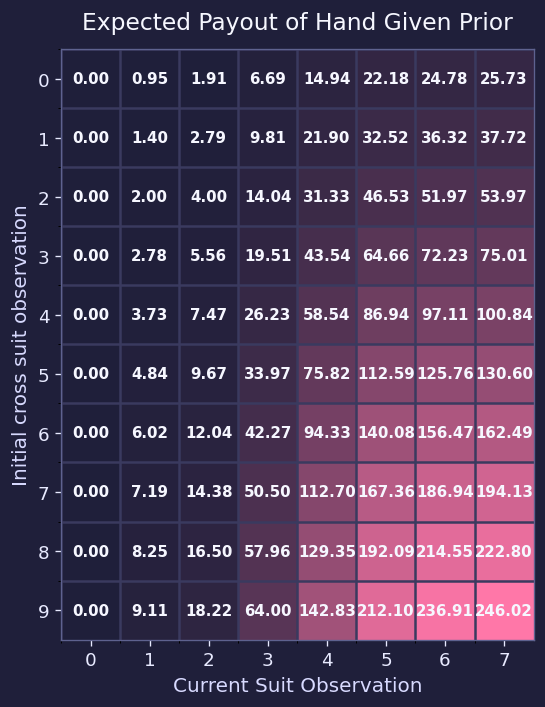

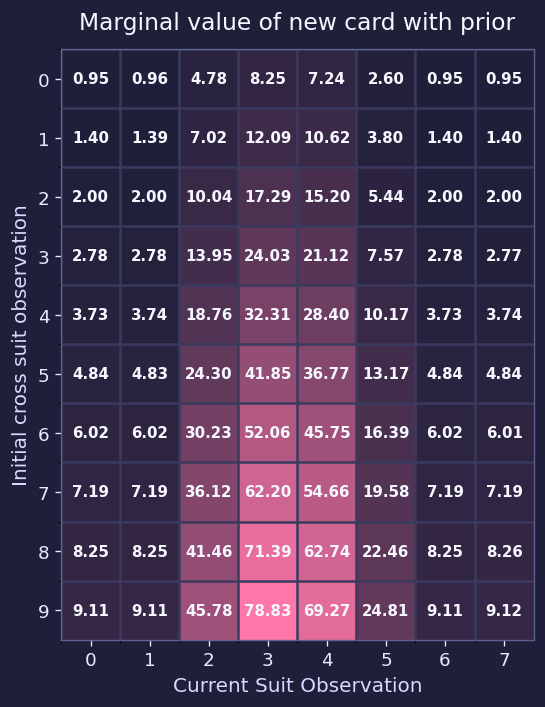

In [115]:
SUIT_OBSERVATIONS = range(0, 8)
CROSS_SUIT_OBSERVATIONS = range(0, 10)

results = np.empty((len(CROSS_SUIT_OBSERVATIONS), len(SUIT_OBSERVATIONS)))
expected_payout = np.empty((len(CROSS_SUIT_OBSERVATIONS), len(SUIT_OBSERVATIONS)))

for cross_idx, cross_suit in enumerate(CROSS_SUIT_OBSERVATIONS):
    for suit_idx, suit_obs in enumerate(SUIT_OBSERVATIONS):
        expected_payout[cross_idx][suit_idx] = expected_payout_of_cards_with_ties(cross_suit, suit_obs)
        results[cross_idx][suit_idx] = marginal_value_of_card_with_ties(cross_suit, suit_obs)

marginal_value_heatmap(CROSS_SUIT_OBSERVATIONS, SUIT_OBSERVATIONS, expected_payout, "Expected Payout of Hand Given Prior", "Current Suit Observation", "Initial cross suit observation")
marginal_value_heatmap(CROSS_SUIT_OBSERVATIONS, SUIT_OBSERVATIONS, results, "Marginal value of new card with prior", "Current Suit Observation", "Initial cross suit observation")